<a href="https://colab.research.google.com/github/CharlesPoletowin/YCBS-273/blob/master/Lecture1_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

Disclaimer: This notebook is modified from the following notebooks:
- https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/tensor_tutorial.ipynb#scrollTo=VswH-KuA8iIs
- https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/autograd_tutorial.ipynb
- https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/nn_tutorial.ipynb#scrollTo=N29T2vcqOnVU

What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

Getting Started
---------------

Tensors
----------

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [0]:
import torch

Construct a 5x3 matrix, uninitialized:



In [0]:
x = torch.empty(5, 3)
print(x)

tensor([[8.5947e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 0.0000e+00, 0.0000e+00]])


Construct a randomly initialized matrix:



In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9402, 0.7386, 0.1908],
        [0.5239, 0.5900, 0.4439],
        [0.8486, 0.8946, 0.7101],
        [0.6064, 0.7136, 0.3344],
        [0.9959, 0.7388, 0.0531]])


Construct a matrix filled zeros and of dtype long:



In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [0]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [0]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)
print('-----------')
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
-----------
tensor([[ 1.8923,  0.6052,  0.2544],
        [ 1.1650, -0.1624,  1.1122],
        [ 1.7084,  0.4722,  0.1196],
        [-0.4437,  1.1565, -0.8016],
        [-1.0711,  2.2638,  0.4137]])


Get its size:



In [0]:
print(x.size(), x.shape)

torch.Size([5, 3]) torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

Operations: 
There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [0]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 2.8878,  0.9037,  0.5156],
        [ 1.2948,  0.0757,  1.1434],
        [ 2.0705,  0.6726,  0.5657],
        [-0.2314,  1.9233,  0.1088],
        [-0.6687,  2.3718,  0.8878]])


Addition: syntax 2



In [0]:
print(torch.add(x, y))

tensor([[ 2.8878,  0.9037,  0.5156],
        [ 1.2948,  0.0757,  1.1434],
        [ 2.0705,  0.6726,  0.5657],
        [-0.2314,  1.9233,  0.1088],
        [-0.6687,  2.3718,  0.8878]])


Addition: providing an output tensor as argument



In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 2.8878,  0.9037,  0.5156],
        [ 1.2948,  0.0757,  1.1434],
        [ 2.0705,  0.6726,  0.5657],
        [-0.2314,  1.9233,  0.1088],
        [-0.6687,  2.3718,  0.8878]])


Addition: in-place



In [0]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 2.8878,  0.9037,  0.5156],
        [ 1.2948,  0.0757,  1.1434],
        [ 2.0705,  0.6726,  0.5657],
        [-0.2314,  1.9233,  0.1088],
        [-0.6687,  2.3718,  0.8878]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [0]:
print(x[:, 1])

tensor([ 0.6052, -0.1624,  0.4722,  1.1565,  2.2638])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [0]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.1063])
-0.10630612075328827


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <http://pytorch.org/docs/torch>`_.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array

In [0]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [0]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [0]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor
--------------------------
See how changing the np array changed the Torch Tensor automatically



In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [0]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([0.8937], device='cuda:0')
tensor([0.8937], dtype=torch.float64)


Automatic differentation
=============

Central to all neural networks in PyTorch is the ``autograd`` package. This let's us calculate the derivatives of parametric functions w.r.t all the parameters. This is used to perrform back-propagation to train neural nets. Let us see a few simple examples of how to use autograd.

In [0]:
from torch.autograd import Variable

## **Simple backward**

In [0]:
x = Variable(torch.Tensor([2]), requires_grad=True)

y = 4*x + 3

y.backward()
print(x.grad)

tensor([4.])


In [0]:
y.grad

In [0]:
x1 = Variable(torch.Tensor([2]), requires_grad=True)
x2 = Variable(torch.Tensor([3]), requires_grad=True)

y = 4*x1 + 3*x2
k = x1**3 + 4*x2**2

y.backward()
k.backward()

print(x1.grad, x2.grad)

tensor([16.]) tensor([27.])


## torch.no_grad()

In [0]:
x = Variable(torch.Tensor([2]), requires_grad=True)
y = torch.Tensor([1])

with torch.no_grad():
  for _ in range(3):
    y = y * x

y.backward()
print(x.grad)

RuntimeError: ignored

In [0]:
x = Variable(torch.Tensor([2]), requires_grad=True)
y = torch.Tensor([1])

with torch.no_grad():
  for _ in range(3):
    y = y * x
y = y * x

y.backward()
print(x.grad)

tensor([8.])


# End-to-end ML pipeline example with MLP

## Task

We will first consider the task of regression. We will generate our own univariate data. Univariate data is easy to visualize.

## Data setup

We will generate our own data. In particular, we will sample points on a polynomial curve. We will add random noise to the data points in ordeer to make the data realistic.

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import math

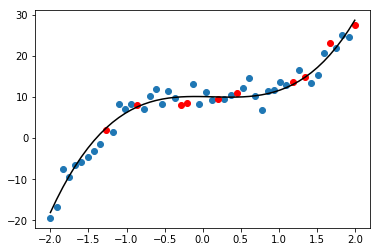

In [0]:
def f(x):
  return (x - 0.2)*(x + 0.3)*(3*x - 1.5) + 10

SIZE = 50
x = np.linspace(-2, 2, SIZE, np.float32)
y = f(x)

# add noise
y_noise = y + 2 * np.random.randn(SIZE)

# data split into training and testing data
idx = list(range(SIZE))
np.random.shuffle(idx)

x_train = x[idx][:40]
y_train = y_noise[idx][:40]

x_test = x[idx][40:]
y_test = y_noise[idx][40:]

# plot train and test points
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'ro')
plt.plot(x, y, 'k-')
# TODO: add labels to the plot

PyTorch uses ``torch.tensor``, rather than numpy arrays, so we need to
convert our data.



In [0]:
x_train, y_train, x_test, y_test = map(
    torch.FloatTensor, (x_train[:, np.newaxis], y_train[:, np.newaxis], x_test[:, np.newaxis], y_test[:, np.newaxis])
)
n, _ = x_train.shape

In [0]:
x_train.shape

torch.Size([40, 1])

In [0]:
x_test.shape

torch.Size([10, 1])

## Loss function

In [0]:
def mse(inp, target):
  return torch.mean((inp - target)**2)
  
loss_func = mse

## Activation functions

In [0]:
def relu(x):
  return torch.where(x > 0, x, torch.zeros(x.shape))

def sigmoid(x):
  return 1/(1 + torch.exp(-x))

def tanh(x):
  return (torch.exp(x) - torch.exp(-x))/(torch.exp(x) + torch.exp(-x))

## Model definition

In [0]:
class Mnist_mlp_classifier():
  def __init__(self):
    self.weights_1 = torch.randn(1, 800)
    self.weights_1.requires_grad_()
    self.bias_1 = torch.zeros(800, requires_grad=True)

    self.weights_2 = torch.randn(800, 1)
    self.weights_2.requires_grad_()
    self.bias_2 = torch.zeros(1, requires_grad=True)
  
  def forward(self, xb):
    h =  xb.matmul(self.weights_1) + self.bias_1
    h = tanh(h)
    h =  h.matmul(self.weights_2) + self.bias_2
    out = h
    return out

## Training

In [0]:
lr = 0.0005  # learning rate
epochs = 250  # how many epochs to train for
bs = 10  # batch size

model = Mnist_mlp_classifier()

y_pred = model.forward(x_test)
print('MSE of model after training: ', mse(y_pred, y_test))

for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
    start_i = i * bs
    end_i = start_i + bs
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
    pred = model.forward(xb)
    loss = loss_func(pred, yb)
    loss.backward()
    
    with torch.no_grad():
      model.weights_1 -= model.weights_1.grad * lr
      model.bias_1 -= model.bias_1.grad * lr
      model.weights_1.grad.zero_()
      model.bias_1.grad.zero_()

      model.weights_2 -= model.weights_2.grad * lr
      model.bias_2 -= model.bias_2.grad * lr
      model.weights_2.grad.zero_()
      model.bias_2.grad.zero_()
      
  print('Loss at epoch %d : %f' % (epoch, loss))

y_pred = model.forward(x_test)
print('MSE of model after training: ', loss_func(y_pred, y_test))

MSE of model after training:  tensor(120.3267, grad_fn=<MeanBackward0>)
Loss at epoch 0 : 31.284595
Loss at epoch 1 : 21.391603
Loss at epoch 2 : 19.561281
Loss at epoch 3 : 18.193947
Loss at epoch 4 : 17.016077
Loss at epoch 5 : 15.986241
Loss at epoch 6 : 15.083712
Loss at epoch 7 : 14.291759
Loss at epoch 8 : 13.596022
Loss at epoch 9 : 12.984096
Loss at epoch 10 : 12.445265
Loss at epoch 11 : 11.970261
Loss at epoch 12 : 11.550993
Loss at epoch 13 : 11.180456
Loss at epoch 14 : 10.852633
Loss at epoch 15 : 10.562223
Loss at epoch 16 : 10.304646
Loss at epoch 17 : 10.075865
Loss at epoch 18 : 9.872429
Loss at epoch 19 : 9.691301
Loss at epoch 20 : 9.529798
Loss at epoch 21 : 9.385622
Loss at epoch 22 : 9.256731
Loss at epoch 23 : 9.141359
Loss at epoch 24 : 9.037945
Loss at epoch 25 : 8.945091
Loss at epoch 26 : 8.861648
Loss at epoch 27 : 8.786531
Loss at epoch 28 : 8.718807
Loss at epoch 29 : 8.657660
Loss at epoch 30 : 8.602373
Loss at epoch 31 : 8.552328
Loss at epoch 32 : 8.506

## Visualizing the trained model 

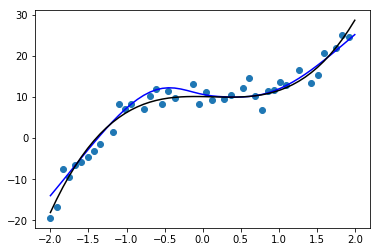

In [0]:
x = torch.linspace(-2, 2, 50).unsqueeze(1)
y_ = model.forward(x)
y = f(x)
plt.plot(x_train.numpy(), y_train.detach().numpy(), 'o')
plt.plot(x.numpy(), y_.detach().numpy(), 'b-')
plt.plot(x.numpy(), y.detach().numpy(), 'k-')